# Predicting first order phase transition of a G-protein with `paysage`

In this notebook I'll show you the resulting Mean Energy and Variance (corresponding to the Heat Capacity) of fantasy contact maps of a G-protein, calculated with a trained Restricted Boltzman Machine constructed with `paysage` ( https://github.com/drckf/paysage.git ) .

From every computed fantasy c-map, I calculate the energy of the single map as the sum over the contacts $c_i$ normalized over the total number of contacts $ C = 1540 $:
$$
E_j = \frac{1}{C} \sum_{i=0}^C c_i,
$$
where $c_i = 1$ if the distance between residues i and j is smaller than a threshold (3.5 Angstrom in my case). 
The resulting mean energy then will be: 
$$
<E^{(k)}> = \frac{1}{N} \sum_{j=0}^N E_j^{(k)},
$$
where $k$ is an index that occurs over the distincts temperatures and $N$ is the total number of contact maps for a particular temperature. 
The Variance (proportional to the Heat Capacity via fluctuation-dissipation theorem) then will be:
$$
(\sigma^2)^{(k)} = <(E^{(k)})^2> - (<E^{(k)}>)^2.
$$

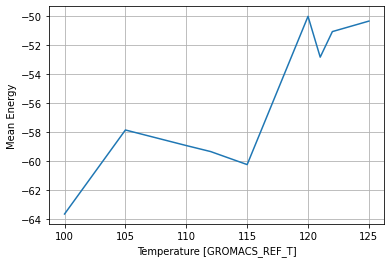

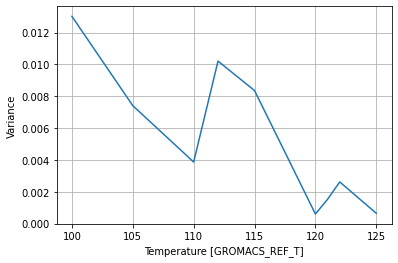

In [18]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Load vectors with data
temperature = np.loadtxt("E_var.dat", usecols=0)
mean_energy = np.loadtxt("E_var.dat", usecols=1)
variance = np.loadtxt("E_var.dat", usecols=2)

# Plot Mean energy vs temperature
plt.plot(temperature, mean_energy)
plt.xlabel('Temperature [GROMACS_REF_T]') 
plt.ylabel('Mean Energy')
plt.grid(True)

# New figure for separated plots
plt.figure()

# Plot Variance vs temperature
plt.plot(temperature, variance)
plt.xlabel('Temperature [GROMACS_REF_T]') 
plt.ylabel('Variance')
plt.grid(True)

plt.show()